<a href="https://colab.research.google.com/github/VIVEK818713/Feature-Engineering/blob/main/7_Handle_Missing_Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handle Missing Value
## to handle missing value you can do 2 thing no.1 you can remove the rows which have missing value. but if you yu remove  row then then some useful information may be also gone so this technique is rarely used but we will discuss it
## no. 2 is to impute the missing value means you can fill these missing value. There are 2 ways to fill the misssing value.
##1. Univariate means when you fill the missing value you are focusing on only 1 column. In univariate you fill the data on the basis of numerical or categorical value.
## in numerical , you can choose 
## a. mean/median
## b. random value
## c. end of distribution
## in categorical, you can fill the value by
## a. Mode(most frequent value)
## b. you can write "Missing"
## in sklearn there is a class simleimputer for univariate.
##2. Multivariate means you are ocusig on multiple columns to fill the missing value. there are 2 technique
## a. KNN imputer
## b. iterative imputer.it works on an algorithm which is called MICE

## So we will understand each of them one by one
## 1. remove missing value
## 2. simple imputer
## 3. KNN imputer
## 4. iterartive imputer
## 5. Missing indicator

## So uderstand first remove missg value which is called complete case Analysis(CCA)
#Complete case analysis.
##This method, also called list-wise deletion, is a straightforward procedure that simply removes all rows or elements containing missing values prior to the analysis.
## means in any row contain missing value then we remove that row.
# When to use CCA
## 1. your data is missing completely at random. means that your data will be missing randomly not continous like startig 50 rows has missing value or last 50 rows missing values of in middle somewhere 50 rows missing value then CCA will not apply or not works good.So your data should be missing completly at random MCAR.
## it will be same as assume there is no missing values in your dataset and you have 1000 rows and you remove randomly 50 rows then the distribution of data will be same.
## if your column have less ten 5% missig value then you can go for CCA . but it is just an assumption.
## You can think if a column have 95% or 80% missing value then you should not remove the rows but wou should remove that columns.

# Advantage
## Easy to implement as no data manipulation required.
## preserev variable distribution( if data is MCAR , then the distribution of the variable of the reduced dataset should match the distribution in the original dataset.
# Disadvantage
## it can exclude the large fraction of the original dataset(if missing data is abundant)
## Excluded observation colud be informative for the analysis ( if the data is not missing at random)
## when usng our model in production , the model will not know how to handle missing data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/0machine learning/csv data/data_science_job.csv")
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0


##Check the missing value and calculate the %age of them

In [ ]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [ ]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [ ]:
df.shape

(19158, 13)

##Now we are going toapply CCA on those column which have less than 5% missing value.

In [ ]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [ ]:
df[cols].sample(3)

,city_development_index,enrolled_university,education_level,experience,training_hours
15181,0.754,no_enrollment,Graduate,13.0,128.0
6,0.920,no_enrollment,High School,5.0,24.0
6206,0.789,Full time course,Phd,8.0,11.0


In [ ]:
len(df[cols].dropna())

17182

In [ ]:
len(df)

19158

In [ ]:
len(df[cols].dropna())/len(df)

0.8968577095730244

In [ ]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

## Now plot the histogram and observe the output of it on numerical columns after apply the CCA.
## Note that you have tocheck the distribution of the data before apply CCA and after the apply the CCA. if the both distribution have campareble then you can apply the CCA but if there is a big change in the distribution then avoid the CCA.

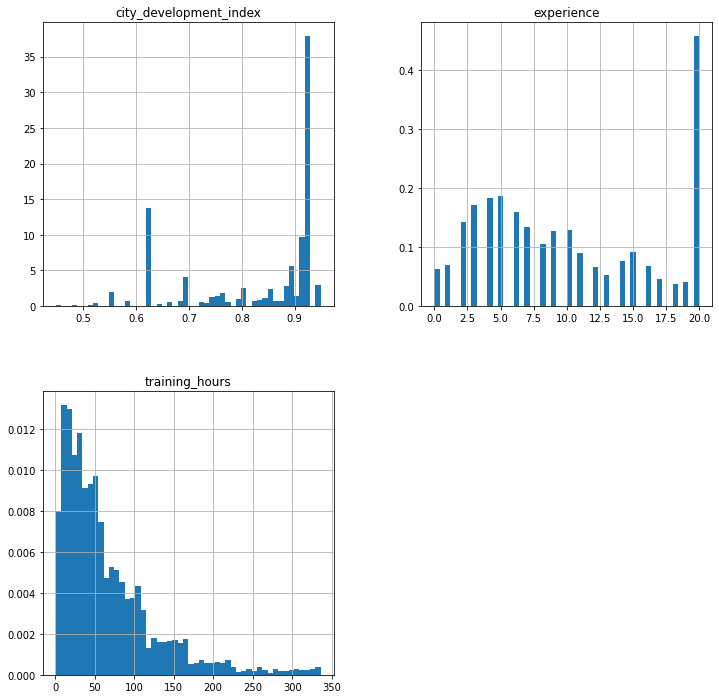

In [ ]:
new_df.hist(bins=50, density=True, figsize=(12, 12))
plt.show()

##Now Analysis individually one by one

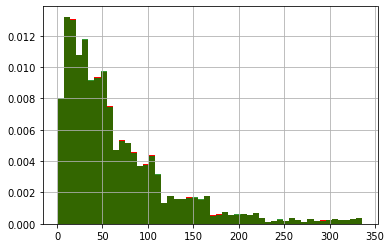

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)


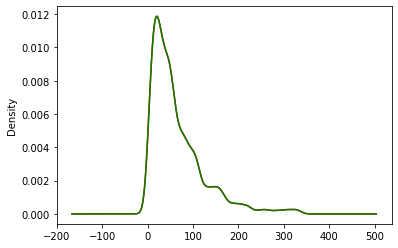

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].plot.density(color='red')

# data after cca
new_df['training_hours'].plot.density(color='green')

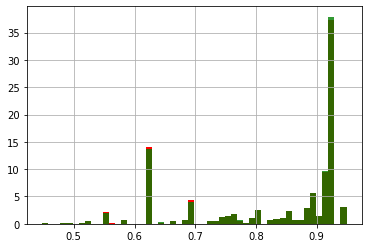

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['city_development_index'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)


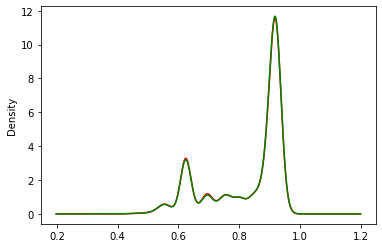

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].plot.density(color='red')

# data after cca
new_df['city_development_index'].plot.density(color='green')

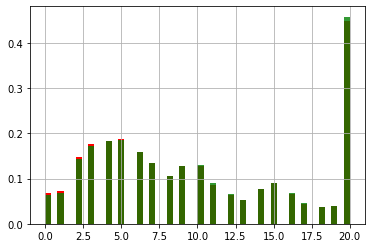

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['experience'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

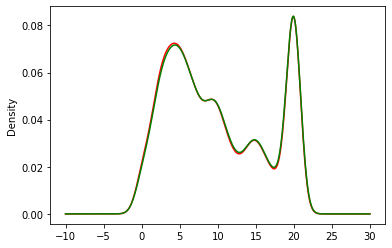

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].plot.density(color='red')

# data after cca
new_df['experience'].plot.density(color='green')

##Now work on **categorical columns**, in the case of categorical data there are some category in the columns so you sholud know that categories first.

In [ ]:
df['enrolled_university'].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [ ]:
df['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

##So what you should know that before CCA the ratio in whole data of each category must be same after the apply CCA. By this we ca conclude that we are working on Missing completlty at random approach

In [ ]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['enrolled_university'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [ ]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['education_level'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['education_level'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


## you should know before the removing rows that missing completely at random criteria is fulfill or not.if it is not then we can not apply CCA. or we have loose some important information.But one problem is here that when we apply this on production then it will not handle missing value because we did not train our model to handle missing value so you should understand this there should not missing value at the production.
## That is why most of the person do not use CCA they try to fill or impute the missing values.

# Handling Missing Numerical Data
## Numerical Columns can be impute by 2 ways first is unvariate impute and second is multivariate impute.
## Univariate imputation means you are using columns values for the imputation of missing value of that same column means you can choose mean or median.
## in mutivariate imputation means you are impute the missing value of a column and using the other columns values for filling the missing value.we will studies 2 technique here first is KNN imputer and second is itartaive imputer.
## Now usderstand univariate imputation for numerical column. we can also apply this on categorical columns but first we will work on numerical columns.
## so will discuss the 4 technique to fill the missing 
## a. mean/median
## b. Arbitrary value
## c. end of distribution
## d. Random value

##Mean/Median--if your distribution is normal then you can go for Mean and if your distribution is skewed right or left side then you should go for Median.if you have greater then 5% missing value then it is not so reliable.The disadvanatge of this is it change the distribution of data.It may be we got some outliers. it may be change in covariance or corelation. You should use it when your data is MCAR and data is missing less then 5%.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/0machine learning/csv data/titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


## Now get the information about the dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


## check the missing value in each column

In [ ]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

## break the data into dependant and independant datasets

In [ ]:
X = df.drop(columns=['Survived'])
y = df['Survived']

## Split the data into train and test and check the shape

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

## now check the missing value in Xtrain 

In [ ]:
X_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

## Calculate the mean and median of AGE and FARE Column

In [ ]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

## Now fill the missing value with mean and median

In [ ]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)

## Check the Xtrain , is it imputed with mean and meadian or not

In [ ]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
359,NaN,7.8792,0,28.75,29.785904,7.8792,7.8792
845,42.0,7.5500,0,42.00,42.000000,7.5500,7.5500
684,60.0,39.0000,2,60.00,60.000000,39.0000,39.0000
83,28.0,47.1000,0,28.00,28.000000,47.1000,47.1000
767,30.5,7.7500,0,30.50,30.500000,7.7500,7.7500


## when you apply mean/median for imputation then you have to check the variance .because your variance will be shrink due to men/median imputation if the variance is large then it is red signal.there are 20% missing value in AGE so there is a variance change and in FARE there is about 5% missing value that is why the variance is low.

In [ ]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  204.34951339046142
Age Variance after median imputation:  161.98956633460548
Age Variance after mean imputation:  161.81262452718676
Original Fare variable variance:  2448.1979137063163
Fare Variance after median imputation:  2340.09102197536
Fare Variance after mean imputation:  2324.2385256705534


##Now check the distribution changes

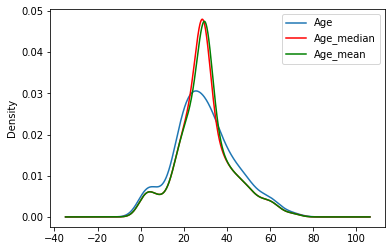

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

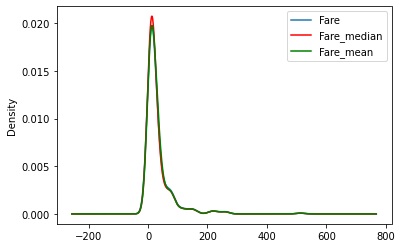

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable diastribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


In [ ]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,64.858859,66.665205
Fare,70.719262,2448.197914,17.258917,57.957599,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.112563,-5.146106,16.476305,16.385048
Age_median,204.349513,57.957599,-5.112563,161.989566,161.812625,53.553455,55.023037
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,51.358000,52.788341
Fare_median,64.858859,2448.197914,16.476305,53.553455,51.358000,2340.091022,2324.238526
Fare_mean,66.665205,2448.197914,16.385048,55.023037,52.788341,2324.238526,2324.238526


In [ ]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.087356,0.090156
Fare,0.092644,1.000000,0.208268,0.091757,0.088069,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.242883,-0.244610,0.205942,0.205499
Age_median,1.000000,0.091757,-0.242883,1.000000,0.999454,0.086982,0.089673
Age_mean,1.000000,0.088069,-0.244610,0.999454,1.000000,0.083461,0.086078
Fare_median,0.087356,1.000000,0.205942,0.086982,0.083461,1.000000,0.996607
Fare_mean,0.090156,1.000000,0.205499,0.089673,0.086078,0.996607,1.000000


##Check for outliers

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


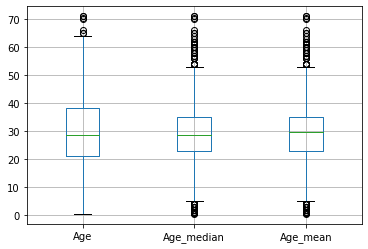

In [ ]:
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


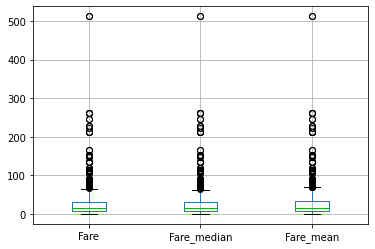

In [ ]:
X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()

## So you can observe we can apply mean/meadian on FARE Column because there is very less changes in covarience nad corelation but there is a big changes in AGE column so we can avoid mean/median on AGE column or we can go for another imputation technique.

#Now try imputation using sklearn

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [ ]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [ ]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [ ]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [ ]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [ ]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [ ]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])

# Arbitrary value imputation
## in this tehnique you will fill missing value by any value which you want like99,999 ,-1etc. Basically this technique is used in categorical colun imputation you use 'Missing' to fill nan values. The whole idea is this your model check where the missing value in your dataset.this arbitrary value shows here is the missing value.

#when to use
##when data missing is not at random


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/0machine learning/csv data/titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [ ]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [ ]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

In [ ]:
X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [ ]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99 wala imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 wala imputation: ', X_train['Age_minus1'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 999 wala imputation: ', X_train['Fare_999'].var())
print('Fare Variance after -1 wala imputation: ', X_train['Fare_minus1'].var())

Original Age variable variance:  204.34951339046142
Age Variance after 99 wala imputation:  951.7275570187188
Age Variance after -1 wala imputation:  318.0896202624488
Original Fare variable variance:  2448.1979137063163
Fare Variance after 999 wala imputation:  47219.202652176304
Fare Variance after -1 wala imputation:  2378.5676784883494


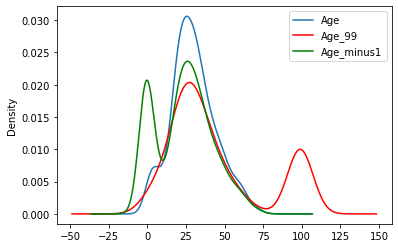

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

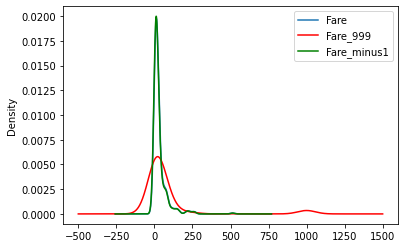

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [ ]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,162.793430,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,11.528625,16.553989
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-159.931663,-94.317400
Age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,257.379887,114.394141
Fare_999,162.793430,2448.197914,11.528625,-159.931663,257.379887,47219.202652,762.474982
Fare_minus1,63.321188,2448.197914,16.553989,-94.317400,114.394141,762.474982,2378.567678


In [ ]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.051179,0.084585
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.032079,0.205233
Age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.023857,-0.062687
Age_minus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.066411,0.131514
Fare_999,0.051179,1.000000,0.032079,-0.023857,0.066411,1.000000,0.071946
Fare_minus1,0.084585,1.000000,0.205233,-0.062687,0.131514,0.071946,1.000000


#Using Sklearn

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
imputer1 = SimpleImputer(strategy='constant',fill_value=99)
imputer2 = SimpleImputer(strategy='constant',fill_value=999)

In [ ]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [ ]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [ ]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [ ]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [ ]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [ ]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])

#End of Distribution Imputation
##If there is suspicion that the missing value is not at random then capturing that information is important. In this scenario, one would want to replace missing data with values that are at the tails of the distribution of the variable.
##In this method we replace missing values with far end values or extreme
##Far end value means the values after 3rd stander deviation

# Handle Categorical Missing Values
## there are two basic technique 1. is most frequent value and 2.is to create new category namly'Missing'
## in numerical data we impute the value using mean /median and in categorical data we impute the value using Mode(most frequent value)
## lets understand the mode if you have a columns namely 'grade' and grade have value good, fair,avg. and you found that fair is coming most of the time or you can say its frequency in the column is high so we will use it as mode(most frequent value) to impute the missing value.
## When to use mode-- if your data is missing completly at random(MCAR) and your mode value is very high then other value means for example 'fair'is our mode value then it comes more and more times in your data then good and avg value. if the diffrence is less then your distribution will change after imputation.
## Good part of this imputaion is this it is easy to use. and bad part of this is it change the distributaion of your data.
## Next is 'Missing Category imputation'in this technique if you have more then 10% missing data so you can not choose mode technique because you can not get the better result by mode so you should go for 'Missing Category imputation'means you fill the missing value by the value'Missing' and create a new category namely 'Missing' so the algorithm understand that where is "Missing' is coming there is a NAN value.
## So now we have 4 categories good fair avg and missing.in this way basically we are not imputing the missing value we are just telling the algorithm that there are missing values.

#frequent-value-imputation(Mode)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

## here we are taking 3 columns for the understanding purpose'GarageQual' and 'FireplaceQu'are categoricalcolumns and 'SalePrice' is a numerical column and this is our target column also. So this is a regression problem.

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/0machine learning/csv data/house_price_train.csv",
usecols=['GarageQual','FireplaceQu','SalePrice'])

In [ ]:
df.head()

## First we have to check how much data is missing. in GarageQual column has less missing values in compare to FireplaceQual

In [ ]:
df.isnull().mean()*100

## lets understand GarageQual first

In [ ]:
df['GarageQual'].value_counts().plot(kind='bar')

## check the mode value for GarageQual. 'TA' is the most frequent value for this column.


In [ ]:
df['GarageQual'].mode()

## lets draw the plot between GarageQualvalue 'TA' vs salesprice and GarageQual value is NA vs salesprice and after that we will fill NA value with TA and check the graph.

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')

In [ ]:
temp = df[df['GarageQual']=='TA']['SalePrice']

In [ ]:
df['GarageQual'].fillna('TA', inplace=True)

In [ ]:
df['GarageQual'].value_counts().plot(kind='bar')

## if you observe the TA bar the value of TA is incresed bar lenght is increases because you have fill NA value with TA. now plot the kde graph

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('GarageQual')

## missing vaule is very less around 5% sothere is no changes in the distribution. now check for next column 'FireplaceQu'

In [ ]:
df['FireplaceQu'].value_counts().plot(kind='bar')

## if you obsereve GD and TA both category is almost equal so here most frequent value(mode) will not work efficiently  but for the understanding purpose we will try this using mode value

In [ ]:
df['FireplaceQu'].mode()

## lets draw the plot between FireplaceQu value 'GD' vs salesprice and FireplaceQu value is NA vs salesprice and after that we will fill NA value with TA and check the graph.

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

In [ ]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']

In [ ]:
df['FireplaceQu'].fillna('Gd', inplace=True)

In [ ]:
df['FireplaceQu'].value_counts().plot(kind='bar')

## if you see the bar plot then GD bar have more value because we have fill all NA values by GD

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('FireplaceQu')

## we have around 50% mssing values that's why distribution has been changed this is not good if any one ask you to impute missing value on this column by mode approach then you will say ' don't impute this column using mode.

# imputation using sklearn

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')

In [ ]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [ ]:
imputer.statistics_

#missing-category-imputation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/0machine learning/csv data/house_price_train.csv",
usecols=['GarageQual','FireplaceQu','SalePrice'])

In [ ]:
df.head()

In [ ]:
df.isnull().mean()*100

In [ ]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

## Now we are filing missing value by the word'MISSING'.it will create new category missing.

In [ ]:
df['GarageQual'].fillna('Missing', inplace=True)

In [ ]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

# missing using sklearn

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='constant',fill_value='Missing')

In [ ]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [ ]:
imputer.statistics_

# Unvariate Data imputation----
# 1.Random Number Imputaion
# 2.Missing Indicator
# 3.Automatically selection of value for imputation

## Random Number Imputation:
## if you have a column lets say age in this age column you have some value and some NA value there.[26.47.34.55,NA , 60 ,70 , NA ,56....]and now you want to fill these missing value by the help of random number imputation . first time it is very confusing but it is not a normal random number . The random number is selected from the value of other value that are present in your column age.like below--
##[26.47.34.55, 60 ,70  ,56....]
## Means you will select random number from your data and fill these missing value.
## it can be applied both numerical as well as categorical column.
## it easy to apply but you can not do this by sklearn but you can do this by Pandas.
## **The distribution of your data or variance not disturb** when you dealing with linear algorithm like linear regression or logistic regression although it is not work good with tree based algorithm. but when we apply mean/meadian or other technique to impute distribution distrubed.
## Covarience or corelation is disturb.because you introduced randmness in your data.
## when you deploye this model on server and new data comes on server and age value is missing then which number will replace NA value, you will replace that value which comes from training time data(X_train) means you have to pick X_train data on the serverso that age missing value encounter then you generate a random number from X_train and replace it on missing value at the time of deployement.But if your **X-train is very heavy then it will take more memory**.
## Now lets work on numerical data and categorical data using random no. imputation----

In [ ]:
import pandas as pd
import numpy as np
import os

## Numerical data imputaion

In [ ]:
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive/Colab Notebooks/Kaggle json'

In [ ]:
!kaggle datasets download -d hesh97/titanicdataset-traincsv

In [ ]:
!unzip /content/titanicdataset-traincsv.zip

In [ ]:
df=pd.read_csv('/content/train.csv',usecols=['Age','Fare','Survived'])
df.head()

In [ ]:
df.isnull().mean() * 100

In [ ]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
X_train

## we have to observe the result before imputation and after imputaion so will create new column namely age_imputed 

In [ ]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [ ]:
X_train.head()

In [ ]:
X_test.tail()

In [ ]:
X_train['Age_imputed']

## Now we will pick those values are null in age_imputed there are 148 values are NAN.

In [ ]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()]

## Now replace these NAN value
##X_train['Age'].dropna().it will remove all the missing values from the age column.
## So now we have only non NAN values
## we apply sample() what sample will do it will provide all 148 values.sample(X_train['Age'].isnull().sum()).values

In [ ]:
X_train['Age'].isnull().sum()

## the below code will provide a series so convert it into nparray we use'values'at the end

In [ ]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

## What we have done below we have imputed random value in age_imputed taking random value from the age column

In [ ]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

## Now check the X_train your NAN values has been imputed by random number from the age column

In [ ]:
X_train

In [ ]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

## blue is original and orange is imputed both distribution are same.now talk about varience

In [ ]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

## Variance is almost same but if you observe the co variance then there is a difference ltes take a look

In [ ]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

## if you talk about the outliers then there is no impact on outliers when you do random number imputation

In [ ]:
X_train[['Age', 'Age_imputed']].boxplot()

#Keep in mind when you apply random number mputation in production
## when you are working on a website in production then it may be there is chance that a column has missing value in our case that column is AGE. For the same input you predict different value means if our FARE is 50 and random number is 40 for AGE and if we again give FARE value 50 and your AGE random number is 60 comes then it is not good because for the same value of FARE as input we should have same value of AGE random number.
## if we have same value of input and random number is different then result will be affeted.
## what you can do? you can use random_state parameter and in random_state you take current observation of FARE ,if FARE value is same then it will take same sampling of random number like below code in production.

In [ ]:
sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

# Now work on categorical data using random number imputation
## we are using house prediction data set and taing 3 columns ['GarageQual','FireplaceQu', 'SalePrice']

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/0machine learning/csv data/house_price_train.csv',
                 usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [ ]:
data.head()

In [ ]:
data.isnull().mean() * 100

## I have whole data in X because we have to plot target column so it is easy for us for that purpose otherwise you can take independant columns in X

In [ ]:
X = data
y = data['SalePrice']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

## now we are going to create two new column GarageQual_imputed and FireplaceQu_imputed and store the oiginal value of GarageQual and FireplaceQu n these columns.because we will show here before iputation data and after imputation data.

In [ ]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [ ]:
  X_train.head()

## here we have use same code as we did in numerical data imputation

In [ ]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

## here we are observing frequencies of all the categories in each categorical column before the imputation and after the imputation.if frequency is changing then it is not good. let's see each column one by one

In [ ]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [ ]:
temp

In [ ]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

## Let's draw the plot before and after impuation on FireplaceQu vs SalesPrice

In [ ]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

In [ ]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()

# Missing Indicator
## in this technique you will create a cmpletely new column for every column which have a missing data.which have only 2 values True and false. true means there is a missing value and False means there is no missing values.what happen in this tecnique , your model will understand the difference b/w missing rows and non missing rows and for this it may be its performance is increased.But this technique not always do good job but sometime ts work well.
## If your accuracy and r2 score is not increased then you should try for this technique.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split



In [ ]:
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive/Colab Notebooks/Kaggle json'

In [ ]:
!kaggle datasets download -d hesh97/titanicdataset-traincsv

In [ ]:
!unzip /content/titanicdataset-traincsv.zip

In [ ]:
df=pd.read_csv('/content/train.csv',usecols=['Age','Fare','Survived'])

In [ ]:
df.head()

In [ ]:
df.isnull().mean() * 100

In [ ]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
X_train.head()

## Before apply missing indicator

In [ ]:
from sklearn.impute import MissingIndicator,SimpleImputer

In [ ]:
si = SimpleImputer()
X_train_trf = si.fit_transform(X_train)
X_test_trf = si.transform(X_test)

## It will give np array

In [ ]:
X_train_trf

## Now apply the logistic regression and check the accuracy

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf,y_train)

y_pred = clf.predict(X_test_trf)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

## Now apply missing indicator and observe the result

In [ ]:
mi = MissingIndicator()

mi.fit(X_train)

In [ ]:
mi.features_

In [ ]:
X_train_missing = mi.transform(X_train)

In [ ]:
X_train_missing

In [ ]:

X_test_missing = mi.transform(X_test)

In [ ]:
X_test_missing

## Now create the new column namely AGE_NA

In [ ]:
X_train['Age_NA'] = X_train_missing

In [ ]:
X_train

In [ ]:
X_test['Age_NA'] = X_test_missing

## Now create an object of sipleimputer and apply the logistic regression algorithm

In [ ]:
si = SimpleImputer()

X_train_trf2 = si.fit_transform(X_train)
X_test_trf2 = si.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf2,y_train)

y_pred = clf.predict(X_test_trf2)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

## Accuracy is increased 

## If you don't want to use missing indicator class then it can dome by simple indicator class also by using the parameter SimpleImputer(add_indicator=True).
## Let's try it

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
si = SimpleImputer(add_indicator=True)

In [ ]:
X_train = si.fit_transform(X_train)
X_test = si.transform(X_test)

## Now apply the algorithm and check the accuary.
## the accuarcy will be same as when we are using missing indicator.
## so what is the benefit of this , by using parameter  SimpleImputer(add_indicator=True) we are not doing the call of missing indicator and create a new column and after that merging that column. so this task is done by the  SimpleImputer(add_indicator=True).

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf2,y_train)

y_pred = clf.predict(X_test_trf2)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

#automatically-select-imputer-parameters----GridSearchCV

In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [ ]:
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive/Colab Notebooks/Kaggle json'

In [ ]:
!kaggle datasets download -d hesh97/titanicdataset-traincsv

In [ ]:
!unzip /content/titanicdataset-traincsv.zip

In [ ]:
df=pd.read_csv('/content/train.csv')
df.head()

In [ ]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [ ]:
df.head()

In [ ]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
X_train.head()

In [ ]:
numerical_features = ['Age', 'Fare']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['Embarked', 'Sex']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [ ]:
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [ ]:
from sklearn import set_config

set_config(display='diagram')
clf

In [ ]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
    'classifier__C': [0.1, 1.0, 10, 100]
}

grid_search = GridSearchCV(clf, param_grid, cv=10)

In [ ]:
grid_search.fit(X_train, y_train)

print(f"Best params:")
print(grid_search.best_params_)

In [ ]:
print(f"Internal CV score: {grid_search.best_score_:.3f}")

In [ ]:
import pandas as pd

cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[['param_classifier__C','param_preprocessor__cat__imputer__strategy','param_preprocessor__num__imputer__strategy','mean_test_score']]

# KNN Imputer

##What are Missing Values?
##A missing value can be defined as the data value that is not captured nor stored for a variable in the observation of interest. There are 3 types of missing values -

##Missing Completely at Random (MCAR)

##MCAR occurs when the missing on the variable is completely unsystematic. When our dataset is missing values completely at random, the probability of missing data is unrelated to any other variable and unrelated to the variable with missing values itself. For example, MCAR would occur when data is missing because the responses to a research survey about depression are lost in the mail.

##Missing at Random (MAR)

##MAR occurs when the probability of the missing data on a variable is related to some other measured variable but unrelated to the variable with missing values itself. For example, the data values are missing because males are less likely to respond to a depression survey. In this case, the missing data is related to the gender of the respondents. However, the missing data is not related to the level of depression itself.

##Missing Not at Random (MNAR)

##MNAR occurs when the missing values on a variable are related to the variable with the missing values itself. In this case, the data values are missing because the respondents failed to fill in the survey due to their level of depression.

##Introduction to k-Nearest Neighbor
##The idea in kNN methods is to identify ‘k’ samples in the dataset that are similar or close in the space. Then we use these ‘k’ samples to estimate the value of the missing data points. Each sample’s missing values are imputed using the mean value of the ‘k’-neighbors found in the dataset.

##Distance calculation in the presence of missing values
##Let’s look at an example to understand this. Consider a pair of observations in a two-dimensional space (2,0), (2,2), (3,3). The  graphical representation of these points are shown below:
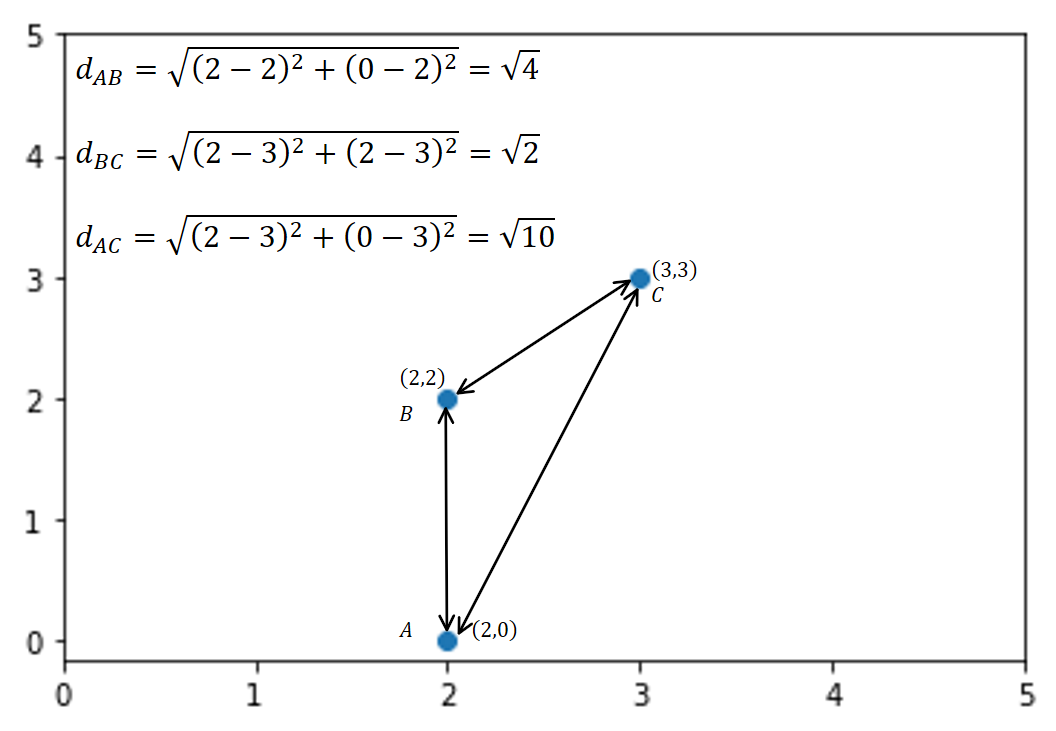

##The points with the shortest distance based on Euclidean distances are considered to be the nearest neighbors. For example, 1-nearest neighbor to Point A is point B. For point B, the 1-nearest neighbor is point C.

 

##In the presence of missing coordinates, the Euclidean distance is calculated by ignoring the missing values and scaling up the weight of the non-missing coordinates.

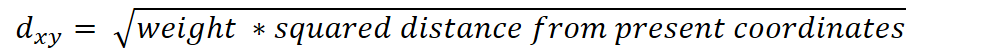

##where
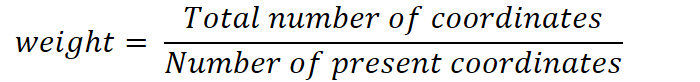

##For example, the Euclidean distances between two points (3, NA, 5) and (1, 0, 0) is:
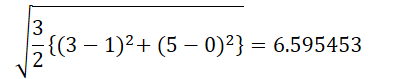

In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split

from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [ ]:
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive/Colab Notebooks/Kaggle json'

In [ ]:
!kaggle datasets download -d hesh97/titanicdataset-traincsv

In [ ]:
!unzip /content/titanicdataset-traincsv.zip

In [ ]:
df=pd.read_csv('/content/train.csv')[['Age','Pclass','Fare','Survived']]
df.head()

In [ ]:
df.isnull().mean() * 100

In [ ]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [ ]:
X_train.head()


## you can change the paramter n_neighbors,weights. and chec the accuarcy of the model. like n_neighbors=3,weights='distance'.weight can be uniform or distance.default is uniform.

In [ ]:
knn = KNNImputer()
X_train_trf = knn.fit_transform(X_train)
X_test_trf = knn.transform(X_test)

In [ ]:
lr = LogisticRegression()

lr.fit(X_train_trf,y_train)

y_pred = lr.predict(X_test_trf)

accuracy_score(y_test,y_pred)

## if we change the parameter value then accuarcy ma be changed let's try it

In [ ]:
knn = KNNImputer(n_neighbors=3,weights='distance')

X_train_trf = knn.fit_transform(X_train)
X_test_trf = knn.transform(X_test)

In [ ]:
lr = LogisticRegression()

lr.fit(X_train_trf,y_train)

y_pred = lr.predict(X_test_trf)

accuracy_score(y_test,y_pred)

## You can see that accuracy is improved when we changing the parameter so you can do this by your self and check the accuracy.
## Now check if we do not use knn imputer and use simple imputer what happen to accuracy

# Comparision with Simple Imputer --> mean

In [ ]:
si = SimpleImputer()

X_train_trf2 = si.fit_transform(X_train)
X_test_trf2 = si.transform(X_test)

In [ ]:
lr = LogisticRegression()

lr.fit(X_train_trf2,y_train)

y_pred2 = lr.predict(X_test_trf2)

accuracy_score(y_test,y_pred2)

# Itrative Imputer--Multivariate
##The Process Behind the Iterations
###Now that you know how to be the “Chosen One”, let’s understand the process behind the iterations.

###Iterative Imputer initially initializes the missing values with the value passed for initial_strategy, where the initial strategy is the “mean” for each feature. The imputer then uses an estimator (where the default estimator used is Bayesian Ridge) at each step of the round-robin imputation. At each step, a feature column is chosen as the target variable y and the other feature columns are treated as predictor variables X. The missing values are then predicted for each feature. This process is repeated for at most “max_iter” number of times, where the default is 10 times (rounds). The reason why I say “at most” and not “exactly” is because early stopping is enabled due to the default parameterization of sample_posterior=False.
###This essentially means that for a single missing value, there are at most max_iter number of predictions and the iterations stop once the difference between the previous iteration prediction and current iteration prediction for a value is smaller than the given tol value (default = 1e-3).

###You can mess around with several other parameters, so be sure to try them out on your own dataset! Now enough of this nerdy stuff, let’s see some action.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression

In [ ]:
df=np.round(pd.read_csv('/content/drive/MyDrive/Colab Notebooks/0machine learning/csv data/50_Startups.csv')[['R&D Spend','Administration','Marketing Spend','Profit']]/10000)
np.random.seed(9)
df = df.sample(5)
df

In [ ]:
df = df.iloc[:,0:-1]
df

In [ ]:
df.iloc[1,0] = np.NaN
df.iloc[3,1] = np.NaN
df.iloc[-1,-1] = np.NaN

In [ ]:
df.head()

# Step 1 - Impute all missing values with mean of respective col

In [ ]:
df0 = pd.DataFrame()

df0['R&D Spend'] = df['R&D Spend'].fillna(df['R&D Spend'].mean())
df0['Administration'] = df['Administration'].fillna(df['Administration'].mean())
df0['Marketing Spend'] = df['Marketing Spend'].fillna(df['Marketing Spend'].mean())

# 0th Iteration

In [ ]:
df0

# Remove the col1 imputed value

In [ ]:
df1 = df0.copy()

df1.iloc[1,0] = np.NaN

df1

# Use first 3 rows to build a model and use the last for prediction


In [ ]:
X = df1.iloc[[0,2,3,4],1:3]
X

In [ ]:
y = df1.iloc[[0,2,3,4],0]
y

In [ ]:
lr = LinearRegression()
lr.fit(X,y)
lr.predict(df1.iloc[1,1:].values.reshape(1,2))

In [ ]:
df1.iloc[1,0] = 23.14

In [ ]:
df1

# Remove the col2 imputed value

In [ ]:
df1.iloc[3,1] = np.NaN

df1

# Use last 3 rows to build a model and use the first for prediction

In [ ]:
X = df1.iloc[[0,1,2,4],[0,2]]
X

In [ ]:
y = df1.iloc[[0,1,2,4],1]
y

In [ ]:
lr = LinearRegression()
lr.fit(X,y)
lr.predict(df1.iloc[3,[0,2]].values.reshape(1,2))

In [ ]:
df1.iloc[3,1] = 11.06

In [ ]:
df1

# Remove the col3 imputed value

In [ ]:
df1.iloc[4,-1] = np.NaN

df1

# Use last 3 rows to build a model and use the first for prediction

In [ ]:
X = df1.iloc[0:4,0:2]
X

In [ ]:
y = df1.iloc[0:4,-1]
y

In [ ]:
lr = LinearRegression()
lr.fit(X,y)
lr.predict(df1.iloc[4,0:2].values.reshape(1,2))

In [ ]:
df1.iloc[4,-1] = 31.56

# After 1st Iteration

In [ ]:
df1

# Subtract 0th iteration from 1st iteration

In [ ]:
df1 - df0

In [ ]:
df2 = df1.copy()

df2.iloc[1,0] = np.NaN

df2

In [ ]:
X = df2.iloc[[0,2,3,4],1:3]
y = df2.iloc[[0,2,3,4],0]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df2.iloc[1,1:].values.reshape(1,2))

In [ ]:
df2.iloc[1,0] = 23.78

In [ ]:
df2.iloc[3,1] = np.NaN
X = df2.iloc[[0,1,2,4],[0,2]]
y = df2.iloc[[0,1,2,4],1]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df2.iloc[3,[0,2]].values.reshape(1,2))

In [ ]:
df2.iloc[3,1] = 11.22

In [ ]:
df2.iloc[4,-1] = np.NaN

X = df2.iloc[0:4,0:2]
y = df2.iloc[0:4,-1]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df2.iloc[4,0:2].values.reshape(1,2))

In [ ]:
df2.iloc[4,-1] = 31.56

In [ ]:
df2

In [ ]:
df2 - df1

In [ ]:
df3 = df2.copy()

df3.iloc[1,0] = np.NaN

df3

In [ ]:
X = df3.iloc[[0,2,3,4],1:3]
y = df3.iloc[[0,2,3,4],0]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df3.iloc[1,1:].values.reshape(1,2))

In [ ]:
df3.iloc[1,0] = 24.57

In [ ]:
df3.iloc[3,1] = np.NaN
X = df3.iloc[[0,1,2,4],[0,2]]
y = df3.iloc[[0,1,2,4],1]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df3.iloc[3,[0,2]].values.reshape(1,2))

In [ ]:
df3.iloc[3,1] = 11.37

In [ ]:
df3.iloc[4,-1] = np.NaN

X = df3.iloc[0:4,0:2]
y = df3.iloc[0:4,-1]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df3.iloc[4,0:2].values.reshape(1,2))

In [ ]:
df3.iloc[4,-1] = 45.53

In [ ]:
df2.iloc[3,1] = 11.22

In [ ]:
df3

In [ ]:
df3 - df2

## After this you should try itrative imputation by yourself till we don not have difference is 0 or near to 0.